# Sales Analysis

In [36]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [37]:
#Task 1, Merging 12 months of sales data into a single file
#df = pd.read_csv("F:\Sales Analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
#files = [file for file in os.listdir("F:\Sales Analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

#data_2019 = pd.DataFrame()

#for file in files:
#    df = pd.read_csv("F:\\Sales Analysis\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"+file)
#    data_2019 = pd.concat([data_2019, df])

In [38]:
#Save as a new csv
#data_2019.to_csv("data_2019.csv", index=False)

In [39]:
#Read the new csv file
df = pd.read_csv("F:\Sales Analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\data_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [40]:
#Task 2, Clean Data, Remove NaN from each column
nan_value = df[df.isna().any(axis=1)]
df = df.dropna(how = 'all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [41]:
#Remove extra headings

#Check the existing of extra headings
temp_df = df[df['Order ID'].str[:5] == 'Order']
temp_df.head()

#Remove extra headings in df
df = df[df['Order ID'].str[:5] != 'Order']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [42]:
#Add Month Column to seperate data in Order Date column
month = df['Order Date'].str[:2]
df['Month'] = month
df['Month'] = df['Month'].astype('int32')
df

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/4072524018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = month
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/4072524018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Question 1, Find the best month for sales and how much was earned that month?

In [43]:
#Task 3 Convert Price Each and Quantity Ordered columns to float

#df['Price Each'] = df['Price Each'].astype('float32')
#df['Quantity Ordered'] = df['Quantity Ordered'].astype('float32')

#Alternative way
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

data_type = df.dtypes
data_type

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3474815483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3474815483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [44]:
#Add a column of total price based on quantity ordered * price each
df['Total Sales'] = df["Quantity Ordered"] * df["Price Each"]
pd.options.display.float_format = "{:,.2f}".format #Show only two decimal places
df

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3389142984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sales'] = df["Quantity Ordered"] * df["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [45]:
#Find the highest sales among 2019 and its sales value
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10903,"1,811,768.38","1,822,256.73"
2,13449,"2,188,884.72","2,202,022.42"
3,17005,"2,791,207.83","2,807,100.38"
4,20558,"3,367,671.02","3,390,670.24"
5,18667,"3,135,125.13","3,152,606.75"
6,15253,"2,562,025.61","2,577,802.26"
7,16072,"2,632,539.56","2,647,775.76"
8,13448,"2,230,345.42","2,244,467.88"
9,13109,"2,084,992.09","2,097,560.13"


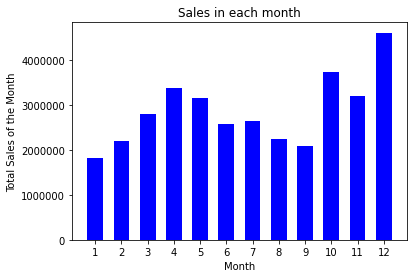

In [46]:
#Data visualization
months = range(1,13)
total_sales_by_months = df.groupby('Month').sum()['Total Sales']
plt.bar(months, total_sales_by_months, color = 'Blue',width = 0.6)
plt.xticks(months)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Month")
plt.ylabel("Total Sales of the Month")
plt.title("Sales in each month")
plt.show()

### Question 2, What city had the higest sales?

In [47]:
#Extract Adrress and State from Purchase Address Column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df["City"] = df["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))
df.head()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3336626462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [48]:
df.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Total Sales
City,,,,
Atlanta GA,16602,"2,779,908.20",104794,"2,795,498.58"
Austin TX,11153,"1,809,873.61",69829,"1,819,581.75"
Boston MA,22528,"3,637,409.77",141112,"3,661,642.01"
Dallas TX,16730,"2,752,627.82",104620,"2,767,975.40"
Los Angeles CA,33289,"5,421,435.23",208325,"5,452,570.80"
New York City NY,27932,"4,635,370.83",175741,"4,664,317.43"
Portland ME,2750,"447,189.25",17144,"449,758.27"
Portland OR,11303,"1,860,558.22",70621,"1,870,732.34"
San Francisco CA,50239,"8,211,461.74",315520,"8,262,203.91"


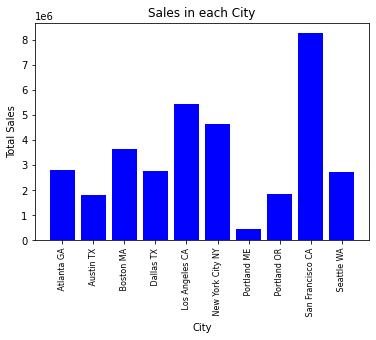

In [49]:
#Data visualization
cities = [city for city, df in df.groupby('City')]
total_sales_by_city = df.groupby('City').sum()['Total Sales']
plt.bar(cities, total_sales_by_city, color = 'Blue',width = 0.8)
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Sales in each City")
plt.show()

### Question 3, What time should we display advertisement to maximize likehood of customer's buying product?

In [50]:
#Change the date time format
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/421219880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [51]:
#Create Hour and Minute columns
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3709962266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/3709962266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


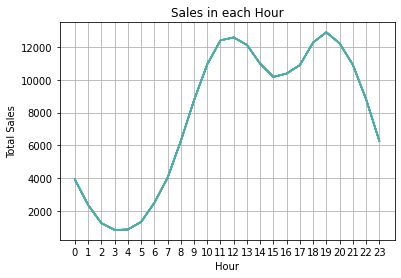

In [52]:
#Data Visualization
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.title("Sales in each Hour")
plt.grid()
plt.show()

#Good time for advertisements are 11am(11) or 7pm(19)

### Question 4, Which products are most often sold together?

In [53]:
#Finding product sold together based on same order ID
duplicate = df[df['Order ID'].duplicated(keep = False)]
duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31


In [54]:
#Join the product together from the same order ID
duplicate['Products'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Drop duplicate row
duplicate = duplicate[['Order ID', 'Products']].drop_duplicates()
duplicate.head()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/4115836948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['Products'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [57]:
#Find the products that are most often sold together
count = Counter()

#For products sold in two together 
#for row in duplicate['Products']:
#    row_list = row.split(',')
#    count.update(Counter(combinations(row_list, 2)))
#
#Show the top 10 products sold together often
#for key, value in count.most_common(10):
#    print(key, value)

#For products sold in three together
for row in duplicate['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
#Show the top 10 products sold together often
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Question 5, Which product sold the most?

In [61]:
#Group by the product by quantity ordered
products = df.groupby('Product')
quantity_ordered = products.sum()['Quantity Ordered']

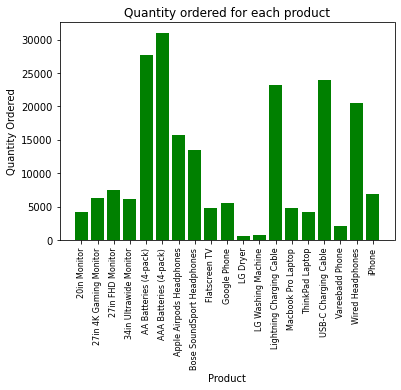

In [66]:
#Data visualization
total_products = [product for product, df in products]
plt.bar(total_products, quantity_ordered, color = 'Green',width = 0.8)
plt.xticks(total_products, rotation = 'vertical', size = 8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Quantity ordered for each product")
plt.show()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_896/1255671470.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(total_products, rotation = 'vertical', size = 8)


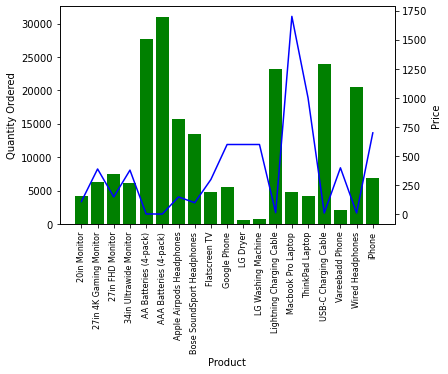

In [77]:
prices = df.groupby('Product').mean()['Price Each']

#Data Visualization for correlation of product, price, and quantity ordered
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(total_products, quantity_ordered, color = 'g')
ax2.plot(total_products, prices, 'b-')
ax1.set_xticklabels(total_products, rotation = 'vertical', size = 8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')

plt.show()